[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/Tabular-Cross-Sectional-Modelling/blob/main/modelling/regression/multiple_linear_regression/runner.ipynb)

In [ ]:
#importing library to print multiple lines in one code shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#importing libraries
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

# cloning required repository for dataset and dependent functions
!git clone https://github.com/khetansarvesh/Tabular-Cross-Sectional-Modelling.git

# renaming the above cloned repo name from Tabular-Cross-Sectional-Modelling to tabular_cross_sectional_modelling
!mv Tabular-Cross-Sectional-Modelling tabular_cross_sectional_modelling

# **Data Preprocessing**

## Reading the Dataset

In [ ]:
df = pd.read_csv('tabular_cross_sectional_modelling/dataset/insurance.txt')
df
df.shape

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


(1338, 4)

## Normalizing the Dataset
X -> (X - mean)/standard deviation

In [ ]:
col_names = np.array(df.columns)
for i in col_names:
    col = np.array(df[i])
    mean_col = np.mean(col)
    std_col = np.std(col)
    norm_col = []
    for j in col:
        norm_col.append((j-mean_col)/std_col)
    df[i] = norm_col
df.head(10)

,age,bmi,children,charges
0,-1.438764,-0.453320,-0.908614,0.298584
1,-1.509965,0.509621,-0.078767,-0.953689
2,-0.797954,0.383307,1.580926,-0.728675
3,-0.441948,-1.305531,-0.908614,0.719843
4,-0.513149,-0.292556,-0.908614,-0.776802
5,-0.584350,-0.807656,-0.908614,-0.785908
6,0.483668,0.455486,-0.078767,-0.415500
7,-0.157143,-0.479567,1.580926,-0.494728
8,-0.157143,-0.136714,0.751079,-0.567017
9,1.480485,-0.791252,-0.908614,1.293027


## Train Validation Test Split

In [ ]:
#train_validation_test split
df_train = df.iloc[0:math.floor(0.7*df.shape[0])]
df_validation = df.iloc[math.floor(0.7*df.shape[0]):math.floor(0.8*df.shape[0])]
df_test = df.iloc[math.floor(0.8*df.shape[0]):]
x_train = np.array(df_train.iloc[:,:-1])
y_train = np.array(df_train.iloc[:,-1])
x_validation = np.array(df_validation.iloc[:,:-1])
y_validation = np.array(df_validation.iloc[:,-1])
x_test = np.array(df_test.iloc[:,:-1])
y_test = np.array(df_test.iloc[:,-1])

In [ ]:
y_train

array([ 2.98583802e-01, -9.53689174e-01, -7.28674670e-01,  7.19842977e-01,
       -7.76802176e-01, -7.85908263e-01, -4.15500302e-01, -4.94727529e-01,
       -5.67016652e-01,  1.29302665e+00, -8.71431544e-01,  1.20096823e+00,
       -9.45321835e-01, -1.80059243e-01,  2.17598349e+00, -9.44463215e-01,
       -2.04294671e-01, -8.98373815e-01, -2.20399040e-01,  1.94680715e+00,
       -3.43441962e-03, -7.53434190e-01, -1.00230691e+00,  2.01821361e+00,
       -5.83745346e-01,  6.03620207e-02,  9.75931891e-02, -8.27550501e-02,
       -8.66981384e-01,  2.10157443e+00,  1.84339196e+00, -9.14645918e-01,
       -7.08986487e-01,  4.12767961e-02,  3.13280608e+00, -9.61959685e-01,
        1.93447110e-01, -9.06045672e-01,  2.18940869e+00,  2.88323341e+00,
       -8.44605589e-01, -6.87346569e-01, -5.78080521e-01, -5.74670348e-01,
       -5.94007657e-01,  6.07977397e-01, -8.15916581e-01, -8.02404859e-01,
       -5.29120119e-02,  2.10142376e+00, -9.13576906e-01, -8.00512626e-01,
        8.50676347e-01,  

# **Data Learning Without Using Sk_learn Library**

In [ ]:
#importing evaluation metric class
from tabular_cross_sectional_modelling.modelling.regression.multiple_linear_regression.evaluation_metric import *

### Using Normal_Equation (Vectorized Formula)

In [ ]:
from tabular_cross_sectional_modelling.modelling.regression.multiple_linear_regression.vectorized_normal_equations import *
#creating objects of user defined class
normal_regressor = NormalEquation()

#since normal equation has no hyperparameters no hyperparameter tuning is required and hence no use of validation dataset

#training and printing coefficients
normal_regressor.fit(x_train,y_train)
coef = normal_regressor.coef_()
print('Cofficients : {}'.format(coef))
print('')

Cofficients : [-0.02981352  0.2999276   0.15798607  0.03405244]



###### Testing / Predicting / Inference

In [ ]:
m = evaluation_metric()

In [ ]:
#calculating evaluation metrics for training dataset
y_pred_train = normal_regressor.predict(x_train)
#print(y_train)
#print(y_pred_train)
print('RMSE--Train: {}'.format(m.rmse(y_train,y_pred_train)))
print('MSE--Train: {}'.format(m.mse(y_train,y_pred_train)))
print('Total Error--Train: {}'.format(m.ssres(y_train,y_pred_train)))
print("")

RMSE--Train: 0.9263889843274103
MSE--Train: 0.858196550283171
Total Error--Train: 401.63598553252405



In [ ]:
#calculating evaluation metrics for testing dataset
y_pred_test = normal_regressor.predict(x_test)
#print(y_test)
#print(y_pred_test)
print('RMSE--Test: {}'.format(m.rmse(y_test,y_pred_test)))
print('MSE--Test: {}'.format(m.mse(y_test,y_pred_test)))
print('Total Error--Test: {}'.format(m.ssres(y_test,y_pred_test)))
print("")

RMSE--Test: 0.9814144893426208
MSE--Test: 0.9631743998916371
Total Error--Test: 129.06536958547937



### Using Gradient_Descent (Vectorized Formula)

In [ ]:
from tabular_cross_sectional_modelling.modelling.regression.multiple_linear_regression.vectorized_gd import *
#creating objects of the user defined class
gradientdescent_regressor = GradientDescent()
m = evaluation_metric()

******************* Learning Rate = 1e-06 ,  No of Iterations = 48627 ******************

Error Every 50 Iterations : [66.02906693 65.90256388 65.77798075 65.65528772 65.53445544 65.41545504
 65.29825809 65.18283662 65.06916311 64.95721046 64.846952   64.73836149
 64.63141311 64.52608143 64.42234143 64.32016849 64.21953838 64.12042724
 64.0228116  63.92666835 63.83197475 63.73870842 63.64684732 63.55636978
 63.46725446 63.37948034 63.29302676 63.20787336 63.12400013 63.04138733
 62.96001558 62.87986577 62.80091911 62.72315708 62.64656148 62.57111439
 62.49679815 62.4235954  62.35148905 62.28046226 62.21049848 62.14158139
 62.07369496 62.00682338 61.9409511  61.87606282 61.81214348 61.74917823
 61.68715249 61.62605188 61.56586226 61.50656969 61.44816049 61.39062114
 61.33393837 61.2780991  61.22309047 61.1688998  61.11551462 61.06292265
 61.01111181 60.96007019 60.90978609 60.86024796 60.81144447 60.76336444
 60.71599686 60.66933091 60.62335592 60.5780614  60.53343701 60.4894726
 60.446

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iteration')

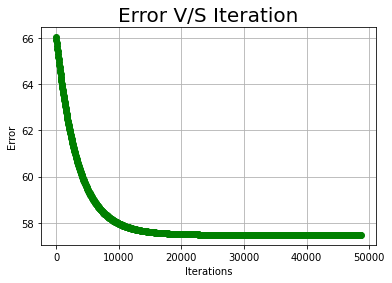

RMSE--Validation: 0.9261870107561725
MSE--Validation: 0.8578223788934545
Total Error--Validation: 57.47409938586145

******************* Learning Rate = 1e-05 ,  No of Iterations = 5912 ******************

Error Every 50 Iterations : [66.02906693 64.84620074 63.83068911 62.95836465 62.20861303 61.56384249
 61.0090336  60.53135694 60.1198485  59.7651338  59.45919343 59.19516371
 58.96716709 58.7701679  58.59984942 58.45250931 58.32497046 58.21450498
 58.11876939 58.03574936 57.96371251 57.90116808 57.84683253 57.7996001
 57.75851764 57.72276306 57.69162694 57.66449668 57.64084301 57.62020838
 57.60219701 57.58646635 57.57271976 57.56070017 57.55018472 57.54098005
 57.53291832 57.52585377 57.5196597  57.51422595 57.50945667 57.50526843
 57.50158854 57.49835365 57.49550851 57.49300494 57.49080084 57.48885946
 57.48714867 57.48564037 57.48430999 57.483136   57.48209956 57.48118415
 57.48037528 57.47966025 57.47902792 57.47846848 57.47797333 57.47753491
 57.47714657 57.47680246 57.47649742 

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iteration')

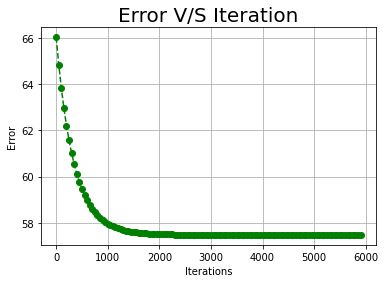

RMSE--Validation: 0.9261866812133527
MSE--Validation: 0.8578217684570046
Total Error--Validation: 57.47405848661931

******************* Learning Rate = 0.0001 ,  No of Iterations = 696 ******************

Error Every 50 Iterations : [66.02906693 59.44028908 57.95518998 57.59913776 57.50842095 57.48396247
 57.47702892 57.47497731 57.47434825 57.47414971 57.47408558 57.47406449
 57.47405745 57.47405508]

Cofficients : [0.08558922 0.25296096 0.17820213 0.12301935]


Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iteration')

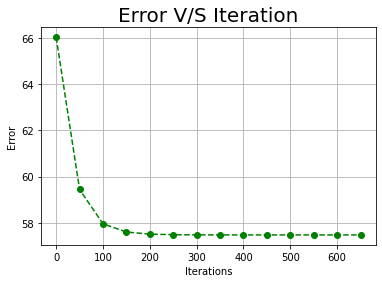

RMSE--Validation: 0.9261866475547984
MSE--Validation: 0.8578217061087964
Total Error--Validation: 57.47405430928936



In [ ]:
#********************** Hyperparameter Tuning using Validation Dataset********************

learning_rate = [0.000001,0.00001,0.0001]
for i in learning_rate:
  gradientdescent_regressor.fit(x_validation,y_validation,i,50000)
  coef = gradientdescent_regressor.coef_()
  error_every_50_iteration = gradientdescent_regressor.error_every_50_iteration()
  print("******************* Learning Rate = {} ******************".format(i))
  print("")
  print('Error Every 50 Iterations : {}'.format(error_every_50_iteration))
  print("")
  print('Cofficients : {}'.format(coef))
  epochs = [50*i for i in range(len(error_every_50_iteration))]
  plt.xlabel("Iterations")
  plt.ylabel("Error")
  plt.title("Error V/S Iteration",fontsize = 20)
  plt.plot(epochs,error_every_50_iteration,color='green',linestyle="--",marker='o')
  plt.grid(True)
  plt.show()

  #calculating evaluation metrics for validation dataset
  y_pred_validation = gradientdescent_regressor.predict(x_validation)
  #print(y_validation)
  #print(y_pred_validation)
  print('RMSE--Validation: {}'.format(m.rmse(y_validation,y_pred_validation)))
  print('MSE--Validation: {}'.format(m.mse(y_validation,y_pred_validation)))
  print('Total Error--Validation: {}'.format(m.ssres(y_validation,y_pred_validation)))
  print("")

In [ ]:
#hence we conclude that 0.0001 is the best learning rate because it gives the least values of errors

#training using train dataset and best hyperparameter
gradientdescent_regressor.fit(x_train,y_train,0.0001)
coef = gradientdescent_regressor.coef_()
print('Cofficients : {}'.format(coef))
print('')

#calculating evaluation metrics for training dataset
y_pred_train = gradientdescent_regressor.predict(x_train)
#print(y_train)
#print(y_pred_train)
print('RMSE--Train: {}'.format(m.rmse(y_train,y_pred_train)))
print('MSE--Train: {}'.format(m.mse(y_train,y_pred_train)))
print('Total Error--Train: {}'.format(m.ssres(y_train,y_pred_train)))
print("")

#calculating evaluation metrics for testing dataset
y_pred_test = gradientdescent_regressor.predict(x_test)
#print(y_test)
#print(y_pred_test)
print('RMSE--Test: {}'.format(m.rmse(y_test,y_pred_test)))
print('MSE--Test: {}'.format(m.mse(y_test,y_pred_test)))
print('Total Error--Test: {}'.format(m.ssres(y_test,y_pred_test)))
print("")


Cofficients : [-0.02980791  0.29991968  0.15798763  0.03405608]

RMSE--Train: 0.9263889843831978
MSE--Train: 0.8581965503865328
Total Error--Train: 401.63598558089734

RMSE--Test: 0.9814131414593207
MSE--Test: 0.9631717542290525
Total Error--Test: 129.06501506669304



### Using Stochastic_Gradient_Descent (Vectorized Formula)

In [ ]:
from tabular_cross_sectional_modelling.modelling.regression.multiple_linear_regression.vectorized_sgd import *
#creating objects of the user defined class
stochasticgradientdescent_regressor = StochasticGradientDescent()
m = evaluation_metric()

*******************Learning Rate = 0.001******************

Error Every 50 Iterations : [66.01889363 65.60773204 64.8356614  ... 57.59986113 57.61322525
 57.61043993]
Cofficients : [0.05771663 0.26536998 0.14354094 0.13513893]


Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iteration')

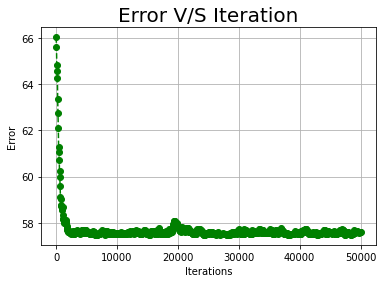

RMSE--Validation: 0.9272849143208226
MSE--Validation: 0.8598573123269753
Total Error--Validation: 57.61043992590734

*******************Learning Rate = 0.01******************

Error Every 50 Iterations : [65.74674349 59.91638879 59.89449635 ... 57.59699824 58.89835777
 61.5805575 ]
Cofficients : [0.29054638 0.14609784 0.30305767 0.12325088]


Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iteration')

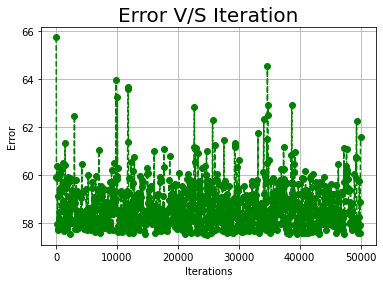

RMSE--Validation: 0.9587037073899168
MSE--Validation: 0.9191127985631713
Total Error--Validation: 61.58055750373248

*******************Learning Rate = 0.1******************

Error Every 50 Iterations : [66.95251853 58.48987728 81.03744995 ... 68.12084404 63.97233882
 79.18501268]
Cofficients : [-0.1113999   0.62492397 -0.2339904  -0.07070849]


Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iteration')

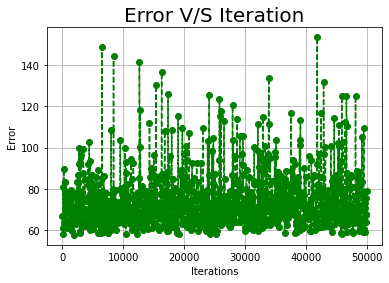

RMSE--Validation: 1.087136541953559
MSE--Validation: 1.1818658608507422
Total Error--Validation: 79.18501267699973



In [ ]:
#********************** Hyperparameter Tuning using Validation Dataset********************

learning_rate = [0.001,0.01,0.1]
for i in learning_rate:
  stochasticgradientdescent_regressor.fit(x_validation,y_validation,i,50000)
  coef = stochasticgradientdescent_regressor.coef_()
  error_every_50_iteration = stochasticgradientdescent_regressor.error_every_50_iteration()
  print("*******************Learning Rate = {}******************".format(i))
  print("")
  print('Error Every 50 Iterations : {}'.format(error_every_50_iteration))
  print('Cofficients : {}'.format(coef))
  epochs = [50*i for i in range(len(error_every_50_iteration))]
  plt.xlabel("Iterations")
  plt.ylabel("Error")
  plt.title("Error V/S Iteration",fontsize = 20)
  plt.plot(epochs,error_every_50_iteration,color='green',linestyle="--",marker='o')
  plt.grid(True)
  plt.show()

  #calculating evaluation metrics for validation dataset
  y_pred_validation = stochasticgradientdescent_regressor.predict(x_validation)
  #print(y_validation)
  #print(y_pred_validation)
  print('RMSE--Validation: {}'.format(m.rmse(y_validation,y_pred_validation)))
  print('MSE--Validation: {}'.format(m.mse(y_validation,y_pred_validation)))
  print('Total Error--Validation: {}'.format(m.ssres(y_validation,y_pred_validation)))
  print("")

In [ ]:
#hence we conclude that 0.001 is the best learning rate because it gives the least values of validation errors

#training using train dataset and best hyperparameter
stochasticgradientdescent_regressor.fit(x_train,y_train,0.001)
coef = stochasticgradientdescent_regressor.coef_()
print('Cofficients : {}'.format(coef))
print('')

#calculating evaluation metrics for training dataset
y_pred_train = stochasticgradientdescent_regressor.predict(x_train)
#print(y_train)
#print(y_pred_train)
print('RMSE--Train: {}'.format(m.rmse(y_train,y_pred_train)))
print('MSE--Train: {}'.format(m.mse(y_train,y_pred_train)))
print('Total Error--Train: {}'.format(m.ssres(y_train,y_pred_train)))
print("")

#calculating evaluation metrics for testing dataset
y_pred_test = stochasticgradientdescent_regressor.predict(x_test)
#print(y_test)
#print(y_pred_test)
print('RMSE--Test: {}'.format(m.rmse(y_test,y_pred_test)))
print('MSE--Test: {}'.format(m.mse(y_test,y_pred_test)))
print('Total Error--Test: {}'.format(m.ssres(y_test,y_pred_test)))
print("")


Cofficients : [-0.04184411  0.28287081  0.16950797  0.05901081]

RMSE--Train: 0.9270075068152822
MSE--Train: 0.8593429176918854
Total Error--Train: 402.1724854798024

RMSE--Test: 0.9800782160187517
MSE--Test: 0.9605533095144989
Total Error--Test: 128.71414347494286



### Using Mini_Batch_Gradient_Descent (Vectorized Formula)

In [ ]:
from tabular_cross_sectional_modelling.modelling.regression.multiple_linear_regression.vectorized_mgd import *
#creating objects of the user defined class
minibatchgradientdescent_regressor = MiniBatchGradientDescent_ErrorDiff_Stop()
m = evaluation_metric()

*******************Learning Rate = 0.0001******************

Error Every 50 Iterations : [66.02906693 32.63321412 39.25492273 ... 26.88623405 29.11354287
 30.74206316]
Cofficients : [0.08433837 0.24836282 0.17339862 0.12372466]


Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iteration')

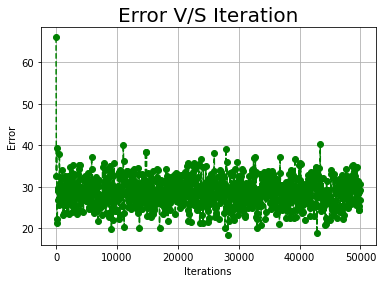

RMSE--Validation: 0.9262155393864043
MSE--Validation: 0.8578752254008478
Total Error--Validation: 57.47764010185681

*******************Learning Rate = 0.001******************

Error Every 50 Iterations : [66.02906693 30.95154969 32.73714184 ... 34.43298566 27.54513219
 34.59064785]
Cofficients : [0.09713746 0.25264944 0.18129604 0.1244512 ]


Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iteration')

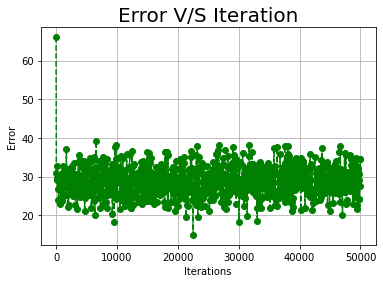

RMSE--Validation: 0.9262617876054423
MSE--Validation: 0.8579608991780294
Total Error--Validation: 57.48338024492797

*******************Learning Rate = 0.01******************

Error Every 50 Iterations : [66.02906693 25.42901474 23.79346531 ... 31.89657232 23.22284295
 27.22151093]
Cofficients : [0.07466841 0.21747084 0.14949434 0.16347831]


Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iteration')

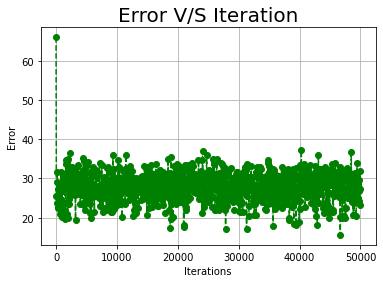

RMSE--Validation: 0.9283576349472992
MSE--Validation: 0.8618478983649427
Total Error--Validation: 57.74380919045116



In [ ]:
#********************** Hyperparameter Tuning using Validation Dataset********************

learning_rate = [0.0001,0.001,0.01]
for i in learning_rate:
  minibatchgradientdescent_regressor.fit(x_validation,y_validation,i,50000,int(len(x_validation)/2))
  coef = minibatchgradientdescent_regressor.coef_()
  error_every_50_iteration = minibatchgradientdescent_regressor.error_every_50_iteration()
  print("*******************Learning Rate = {}******************".format(i))
  print("")
  print('Error Every 50 Iterations : {}'.format(error_every_50_iteration))
  print('Cofficients : {}'.format(coef))
  epochs = [50*i for i in range(len(error_every_50_iteration))]
  plt.xlabel("Iterations")
  plt.ylabel("Error")
  plt.title("Error V/S Iteration",fontsize = 20)
  plt.plot(epochs,error_every_50_iteration,color='green',linestyle="--",marker='o')
  plt.grid(True)
  plt.show()

  #calculating evaluation metrics for validation dataset
  y_pred_validation = minibatchgradientdescent_regressor.predict(x_validation)
  #print(y_validation)
  #print(y_pred_validation)
  print('RMSE--Validation: {}'.format(m.rmse(y_validation,y_pred_validation)))
  print('MSE--Validation: {}'.format(m.mse(y_validation,y_pred_validation)))
  print('Total Error--Validation: {}'.format(m.ssres(y_validation,y_pred_validation)))
  print("")

In [ ]:
#hence we conclude that 0.0001 is the best learning rate because it gives the least values of validation errors

#training using train dataset and best hyperparameter
minibatchgradientdescent_regressor.fit(x_train,y_train,0.0001,int(len(x_train)/2))
coef = minibatchgradientdescent_regressor.coef_()
print('Cofficients : {}'.format(coef))
print('')

#calculating evaluation metrics for training dataset
y_pred_train = minibatchgradientdescent_regressor.predict(x_train)
#print(y_train)
#print(y_pred_train)
print('RMSE--Train: {}'.format(m.rmse(y_train,y_pred_train)))
print('MSE--Train: {}'.format(m.mse(y_train,y_pred_train)))
print('Total Error--Train: {}'.format(m.ssres(y_train,y_pred_train)))
print("")

#calculating evaluation metrics for testing dataset
y_pred_test = minibatchgradientdescent_regressor.predict(x_test)
#print(y_test)
#print(y_pred_test)
print('RMSE--Test: {}'.format(m.rmse(y_test,y_pred_test)))
print('MSE--Test: {}'.format(m.mse(y_test,y_pred_test)))
print('Total Error--Test: {}'.format(m.ssres(y_test,y_pred_test)))
print("")


Cofficients : [0.0005827  0.0140242  0.01089132 0.00195651]

RMSE--Train: 0.9871786346866176
MSE--Train: 0.9745216567817344
Total Error--Train: 456.0761353738517

RMSE--Test: 1.019562107464014
MSE--Test: 1.0395068909764618
Total Error--Test: 139.2939233908459



# **Data Learning Using SKlearn Library**

In [ ]:
# -------------------------------------------- hyperparameter tuning using validation dataset------------------------------------------------------

#sklearn is a package -> linear_model is a library in that package -> LinearRegression is a class in linear_model library -> regressor is an object of LinearRegressor class , you can name it anything
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#this fit() is a function in LinearRegression class, it does all the math for us which we learnt in the theory -> we are giving only two arguments as inputs rest are taken as default arguments and are also called hyperparemeters
regressor.fit(x_validation,y_validation)
print("")

#calculating evaluation metric for validation dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_pred_validation = regressor.predict(x_validation)
print("RMSE --validation : {}".format(np.sqrt(mean_squared_error(y_validation, y_pred_validation))))
print("R2_Score --validation : {}".format(r2_score(y_validation,y_pred_validation)))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


RMSE --validation : 0.9261866438534724
R2_Score --validation : 0.12703877483387993


In [ ]:
# ------------------------------ testing model using both training and testing dataset----------------------------------------

#training using training dataset
regressor.fit(x_train,y_train)
print("")
print('linear model coeff (w): {}'.format(regressor.coef_))
print('linear model intercept (b): {}'.format(regressor.intercept_))
print("")

#calculating evalutation metrics on train dataset
y_pred_train = regressor.predict(x_train)
print("rmse --train = {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print("r2_score --train = {}".format(r2_score(y_train,y_pred_train)))

#calculating evalutation metrics on test dataset
y_pred_test = regressor.predict(x_test)
print("rmse --test = {}".format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print("r2_score --test = {}".format(r2_score(y_test,y_pred_test)))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


linear model coeff (w): [0.2999276  0.15798607 0.03405244]
linear model intercept (b): -0.029813521392349177

rmse --train = 0.9263889843274103
r2_score --train = 0.13083309574623003
rmse --test = 0.9814144893426208
r2_score --test = 0.08303693882592467


In [ ]:
#----------------------------------------- k fold cross validation - training model using best learnt hyperparameter using training dataset---------------------------------
from sklearn.model_selection import cross_val_score
cross_validation_accuracies = cross_val_score(regressor,x_train,y_train,scoring = "neg_mean_squared_error",cv=5)
print(cross_validation_accuracies)
print("Mean = {}".format(np.mean(cross_validation_accuracies)))

[-0.94570314 -0.89071851 -0.77137445 -0.96551345 -0.74344444]
Mean = -0.8633507963663141
